In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
import os

%matplotlib inline

In [2]:
calendar = pd.read_csv('./seattle/calendar.csv')
listings = pd.read_csv('./seattle/listings.csv')
reviews = pd.read_csv('./seattle/reviews.csv')

price_maps_path = './charts/maps/price'
vacancy_maps_path = './charts/maps/vacancy'

In [3]:
map = gpd.read_file('./seattle/Seattle_Neighborhoods/Seattle_Neighborhoods.shp')
map

OBJECTID_1  OBJECTID          AREA  PERIMETER  HOODS_  HOODS_ID  \
0             1         1  3.588443e+03    617.843       2         0   
1             2         2  2.229478e+04    733.568       3         0   
2             3         3  5.669537e+04   4088.442       5         0   
3             4         4  6.415681e+04   1809.446       6         0   
4             5         5  2.993164e+03    250.330       7         0   
5             6         6  1.137106e+04    408.586       8         0   
6             7         7  1.315780e+04    474.931       9         0   
7             8         8  2.664951e+03    197.126      10         0   
8             9         9  1.773268e+03    184.870      11         0   
9            10        10  1.190226e+05   1688.760      12         0   
10           11        11  2.609426e+03    239.993      13         0   
11           12        12  3.129215e+03    271.169      14         0   
12           13        13  6.258477e+03    434.345      15         0   
13           14        14  1.138620e+04    403.787      16         0   
14           15        15  1.698931e+04    666.719      17         0   
15           16        16  2.708875e+03    216.947      18         0   
16           17        17  7.245840e+02    143.478      19         0   
17           18        18  7.715780e+02    130.735      20         0   
18           19        19  1.462592e+06   6965.418      21         0   
19           20        20  1.804074e+05   2492.090      22         0   
20           21        21  3.248042e+03    286.629      23         0   
21           22        22  1.418240e+04    567.650      24         0   
22           23        23  1.894648e+04    577.787      25         0   
23           24        24  9.928967e+03    403.760      26         0   
24           25        25  3.556578e+04    730.198      27         0   
25           26        26  4.855840e+02     86.526      28         0   
26           27        27  2.132066e+07  18831.010      29       120   
27           28        28  2.243128e+07  27347.494      30       129   
28           29        29  1.419569e+07  15934.439      31       121   
29           30        30  2.219937e+07  21789.650      32       130   
..          ...       ...           ...        ...     ...       ...   
89           90        90  2.945466e+07  23549.932      92       174   
90           91        91  3.303827e+07  25917.117      93       180   
91           92        92  2.334301e+07  23180.396      94       182   
92           93        93  1.792332e+07  23416.340      95       190   
93           94        94  1.878106e+07  22360.047      96       191   
94           95        95  4.383528e+07  52212.785      97       173   
95           96        96  3.059971e+07  23840.219      98       117   
96           97        97  4.421636e+06  10013.274      99       143   
97           98        98  1.976319e+07  34138.930     100       146   
98           99        99  2.468095e+07  26230.434     101       147   
99          100       100  3.023924e+07  26851.947     102       151   
100         101       101  2.603959e+07  25522.346     103       149   
101         102       102  2.151273e+07  20753.002     104       106   
102         103       103  3.097739e+07  31987.734     105       107   
103         104       104  1.703485e+07  18770.281     106       108   
104         105       105  2.583674e+07  19993.816     107       104   
105         106       106  2.044149e+07  22788.760     108       105   
106         107       107  2.468199e+07  58047.309     109       198   
107         108       108  2.046117e+03    230.170     110         0   
108         109       109  5.813891e+05   3664.745     111         0   
109         110       110  4.811345e+07  34640.309     112       100   
110         111       111  2.769034e+07  26446.203     113       101   
111         112       112  4.720308e+07  29413.553     114       102   
112         113       113  2.943885e+07  2617

In [4]:
area_map = map[['geometry','AREA','OBJECTID_1']]


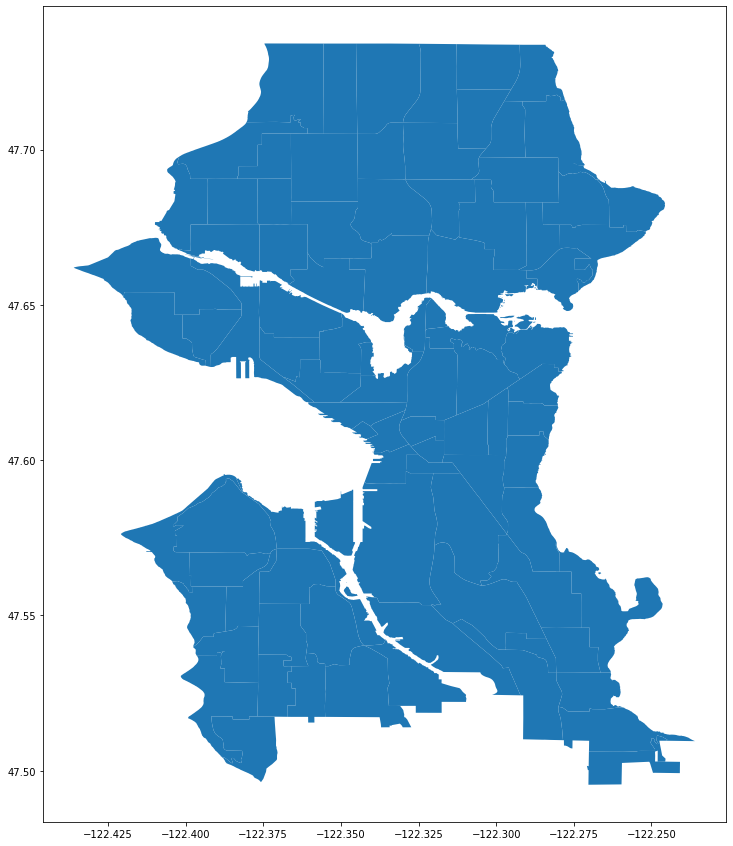

In [5]:
fig,ax = plt.subplots(figsize = (15,15))
map.plot(ax=ax);

In [6]:
geometry = [Point(xy) for xy in zip(listings['longitude'],listings['latitude'])]
crs = {'init':'epsg:4326'}

In [7]:
geo_listings = gpd.GeoDataFrame(listings, crs = crs, geometry = geometry )
geo_listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... requires_license  \
0                                                NaN  ...                f   
1  Queen Anne is a wonderful, truly functional vi...  ...                f   
2  Upper Queen Anne is a charming neighborhood fu...  ...                f   
3                                                NaN  ...                f   
4  We are in the beautiful neighborhood of Queen ...  ...                f   

  license jurisdiction_names instant_bookable cancellation_policy  \
0     NaN         WASHINGTON                f            moderate   
1     NaN         WASHINGTON                f              strict   
2     NaN         WASHINGTON                f              strict   
3     NaN         WASHINGTON                f            flexible   
4     NaN         WASHINGTON                f              strict   

  require_guest_profile_picture  require_guest_phone_verification  \
0                             f                                 f   
1                             t                                 t   
2                             f                                 f   
3                             f                                 f   
4                             f                                 f   

  calculated_host_listings_count reviews_per_month  \
0                              2              4.07   
1                              6              1.48   
2                              2              1.15   
3                              1               NaN   
4                              1              0.89   

                                       geometry  
0  POINT (-122.3710251999777 47.63628903835718)  
1  POINT (-122.3656664643958 47.63912312136253)  
2  POINT (-122.3694831756176 47.62972413157735)  
3  POINT (-122.3692791226302 47.63847320176642)  
4  POINT (-122.3724706340222 47.63291840276724)  

[5 rows x 93 columns]

In [8]:
airbnb_within_area = gpd.sjoin(geo_listings, area_map, how="inner", op='intersects')
airbnb_within_area['price'] = airbnb_within_area['price'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)


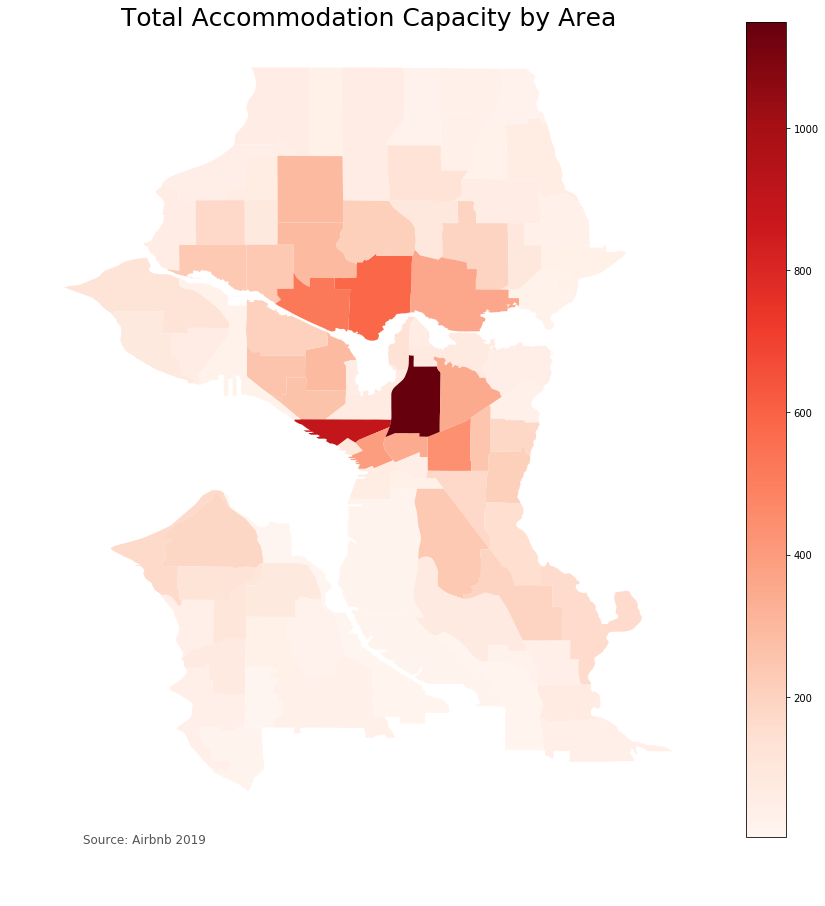

In [9]:
def agg_feat_by_area(df_map, df_feat, feat, colormap, title, agg_type = 'sum'):
    
    if agg_type == 'sum':
        feat_within_area = df_feat[['OBJECTID_1',feat]].groupby('OBJECTID_1', as_index = False).sum()
    if agg_type == 'mean':
        feat_within_area = df_feat[['OBJECTID_1',feat]].groupby('OBJECTID_1', as_index = False).mean()   
        
    feat_map = pd.merge(df_map, feat_within_area, on = 'OBJECTID_1', how = 'inner')
        
    fig,ax = plt.subplots(figsize = (15,15))
    
    feat_map.plot(ax = ax, column = feat, cmap = colormap);
    
    ax.axis('off')
    
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    
    ax.annotate('Source: Airbnb 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    
    vmin, vmax = feat_map[feat].min(), feat_map[feat].max()
    
    sm = plt.cm.ScalarMappable(cmap = colormap, norm = plt.Normalize(vmin=vmin, vmax=vmax))
    
    cbar = fig.colorbar(sm)
    
    return feat_map
    
accommodates_map = agg_feat_by_area(area_map,airbnb_within_area,'accommodates','Reds', 'Total Accommodation Capacity by Area', 'sum')

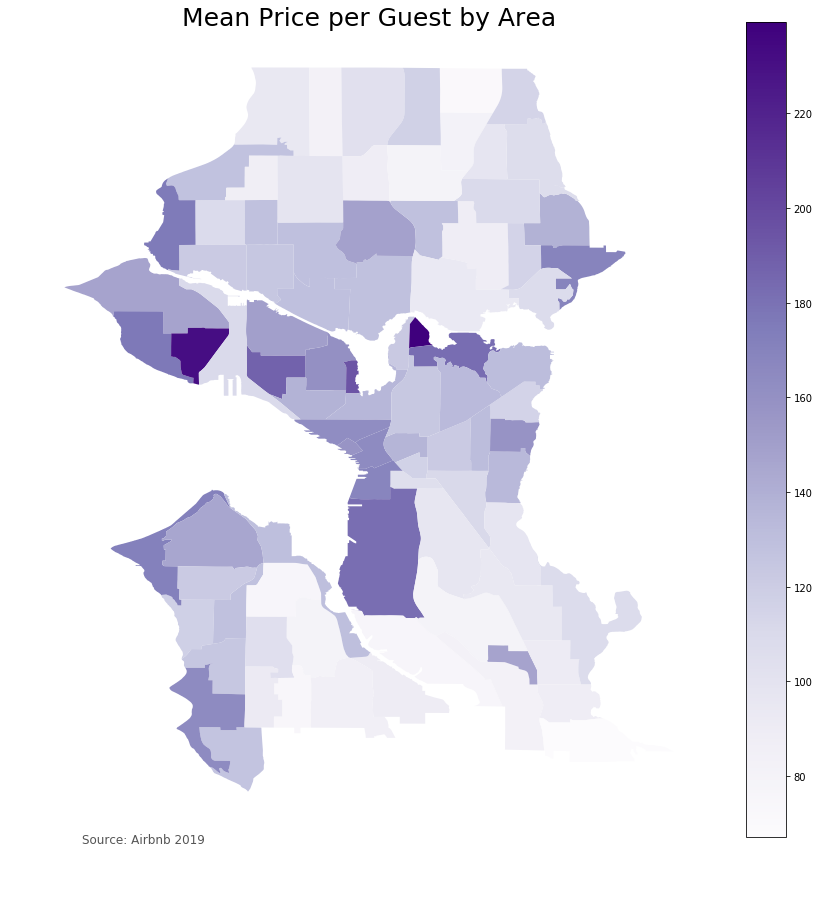

In [10]:
prices_map = agg_feat_by_area(area_map,airbnb_within_area,'price','Purples', 'Mean Price per Guest by Area', 'mean')

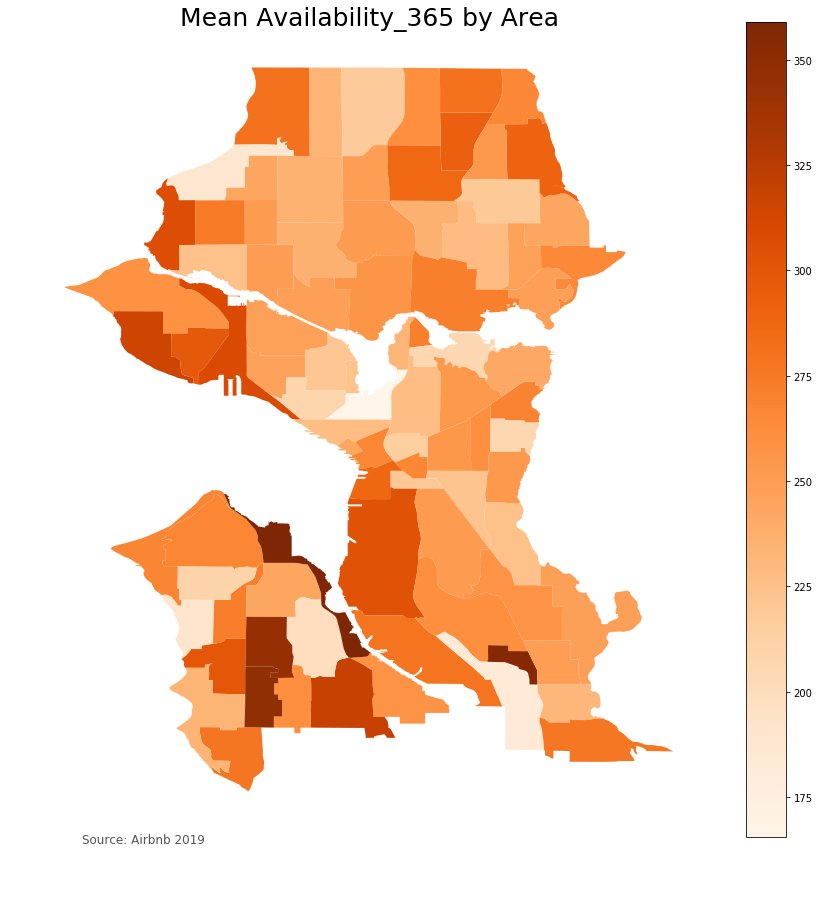

In [11]:
availability_map = agg_feat_by_area(area_map,airbnb_within_area,'availability_365','Oranges', 'Mean Availability_365 by Area', 'mean')

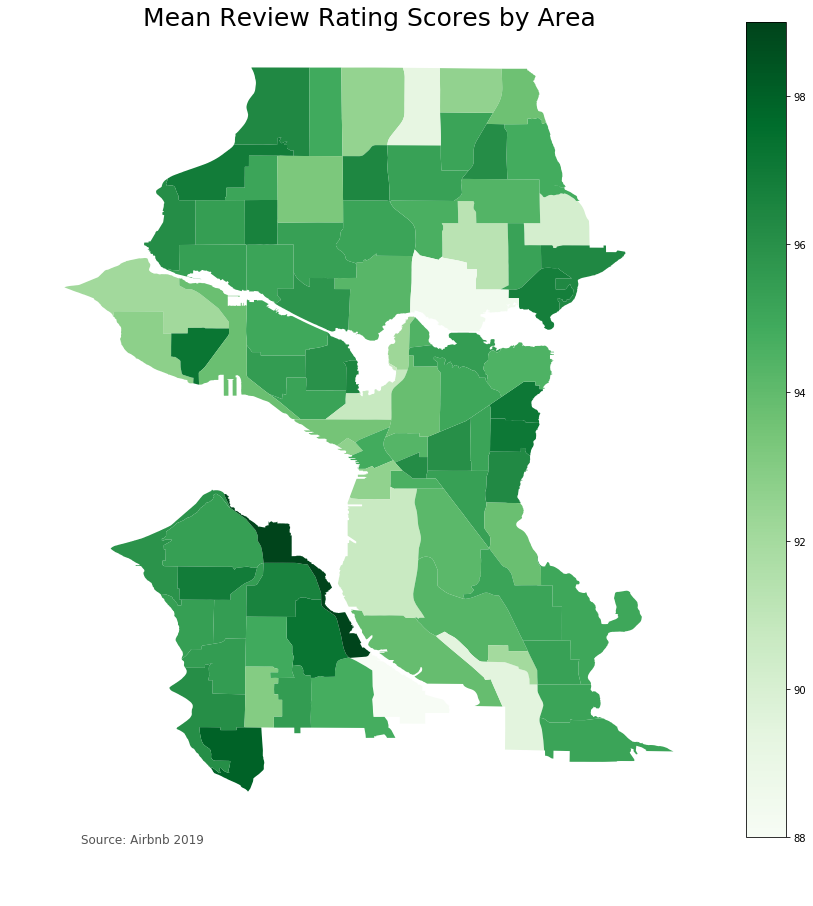

In [12]:
rating_map = agg_feat_by_area(area_map,airbnb_within_area,'review_scores_rating','Greens', 'Mean Review Rating Scores by Area', 'mean')

In [13]:
feat_map = pd.merge(prices_map, accommodates_map[['OBJECTID_1','accommodates']], on = 'OBJECTID_1', how = 'inner')
feat_map = pd.merge(feat_map, availability_map[['OBJECTID_1','availability_365']], on = 'OBJECTID_1', how = 'inner')
feat_map.head()

geometry        AREA  OBJECTID_1  \
0  POLYGON ((-122.376336564281 47.6759176989427, ...  21320656.0          27   
1  POLYGON ((-122.376336564281 47.6759176989427, ...  22431280.0          28   
2  POLYGON ((-122.376336564281 47.6759176989427, ...  14195687.0          29   
3  POLYGON ((-122.376336564281 47.6759176989427, ...  22199366.0          30   
4  POLYGON ((-122.347307566491 47.6650052910614, ...  32123118.0          31   

        price  accommodates  availability_365  
0  109.384615           173        274.865385  
1  121.671429           238        224.900000  
2  128.653846            83        252.269231  
3  124.343750           239        250.140625  
4  129.520548           292        235.972603

In [14]:
calendar_geo = pd.merge(calendar, airbnb_within_area[['id','OBJECTID_1','geometry']], left_on = 'listing_id', right_on ='id',how = 'inner')
calendar_geo['price'] = calendar_geo['price'].apply(lambda x: str(x)).apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)
calendar_geo['available'] = calendar_geo['available'].replace({'t':1,'f':0})
calendar_geo['date'] = pd.to_datetime(calendar_geo['date'], format = '%Y-%m-%d')


def feat_per_area_plot(object_id):
    calendar_geo_area = calendar_geo[calendar_geo.OBJECTID_1 == object_id]
    #calendar_geo_area = calendar_geo
    calendar_geo_area_available = calendar_geo_area[calendar_geo_area.available == 1]
    calendar_geo_area_mean_price_per_month = calendar_geo_area_available[['date','price']].set_index('date').groupby(pd.Grouper(freq='M')).mean()
    
    
    calendar_geo_area_vacancy_per_month = calendar_geo_area[['date','available']].set_index('date').groupby(pd.Grouper(freq='M')).mean()
    
    fig, (ax0,ax1) = plt.subplots(1, 2,figsize=(10, 4))
    line_weight = 3
    alpha = .5
    fig_map = map[map.OBJECTID_1 == object_id].plot(ax=ax0); 
    fig_map.axis('off')
    ax2 = ax1.twinx()
    lns1 = ax1.plot(calendar_geo_area_mean_price_per_month, color='blue', lw=line_weight, alpha=alpha, label='Mean Price')
    lns2 = ax2.plot(calendar_geo_area_vacancy_per_month, color='orange', lw=line_weight, alpha=alpha, label='Vacancy Rate')
    
    leg = lns1 + lns2;
    
    labs = [l.get_label() for l in leg]
    ax1.legend(leg, labs, loc=0)
    ax1.set_ylabel('Mean Price')
    ax2.set_ylabel('Vacancy Rate')
    
    plt.show()
    


In [15]:
calendar_geo_area = calendar_geo[calendar_geo.available == 1].copy()
calendar_geo_area['month_year'] =  calendar_geo_area['date'].apply(lambda r: r.strftime('%Y-%m'))
month_year = calendar_geo_area['month_year'].unique()

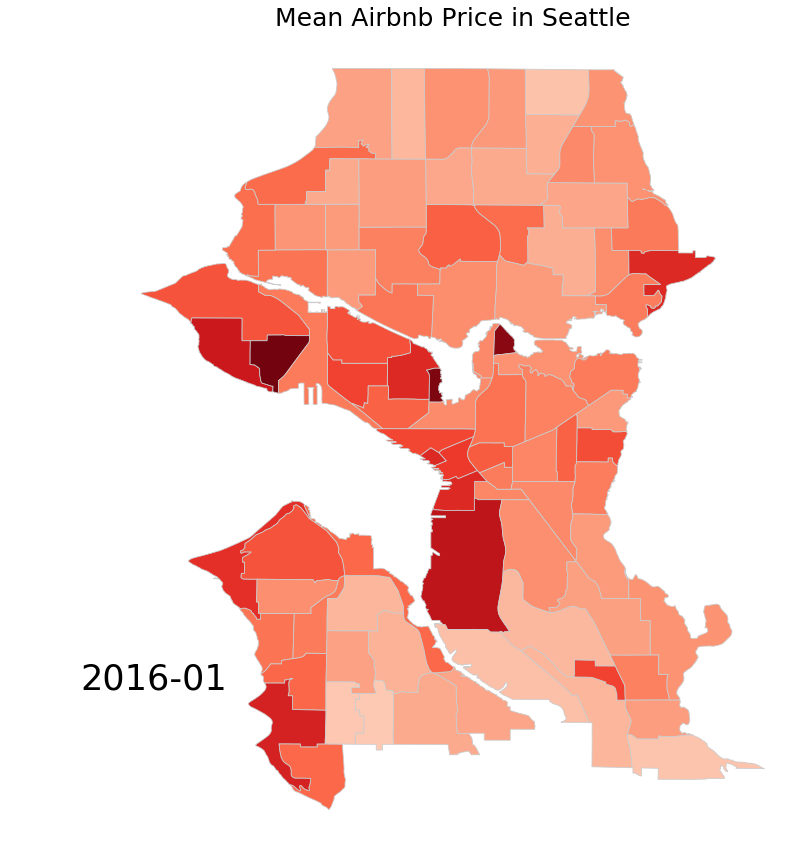

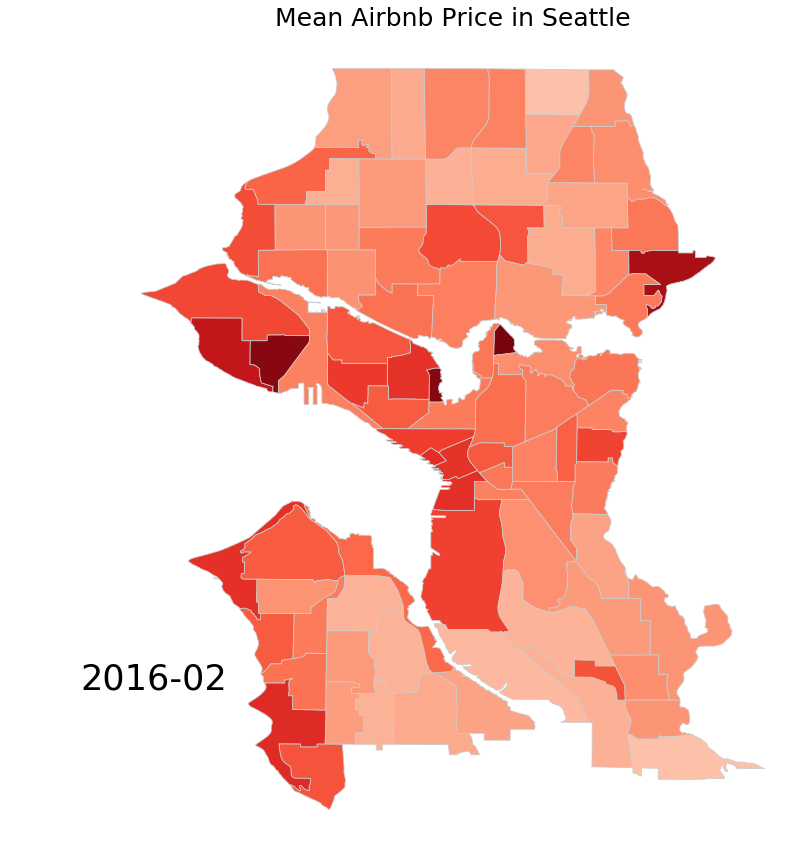

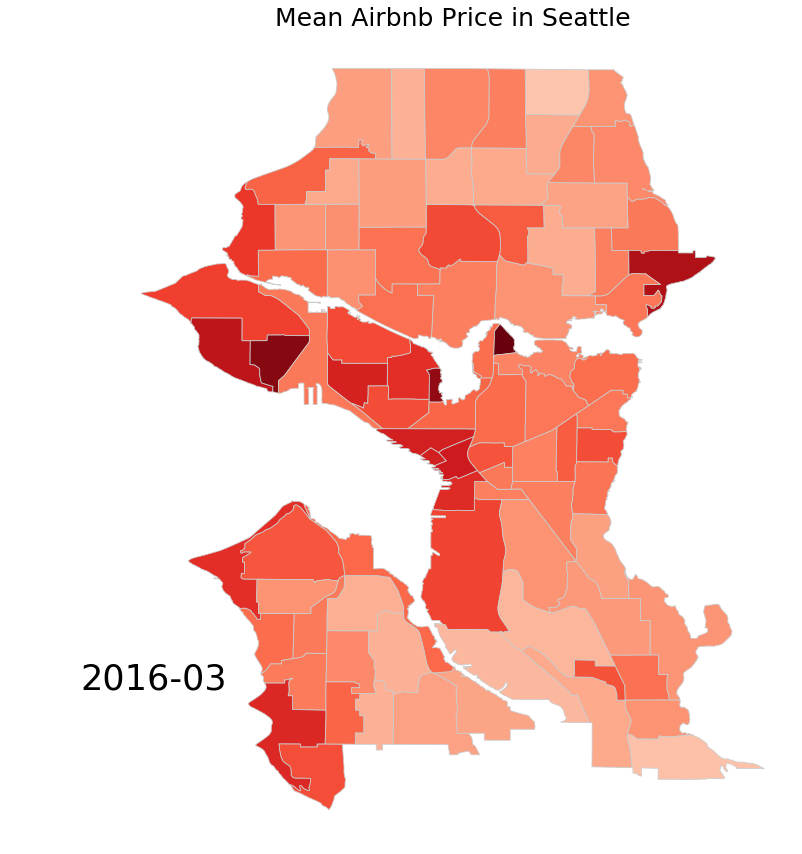

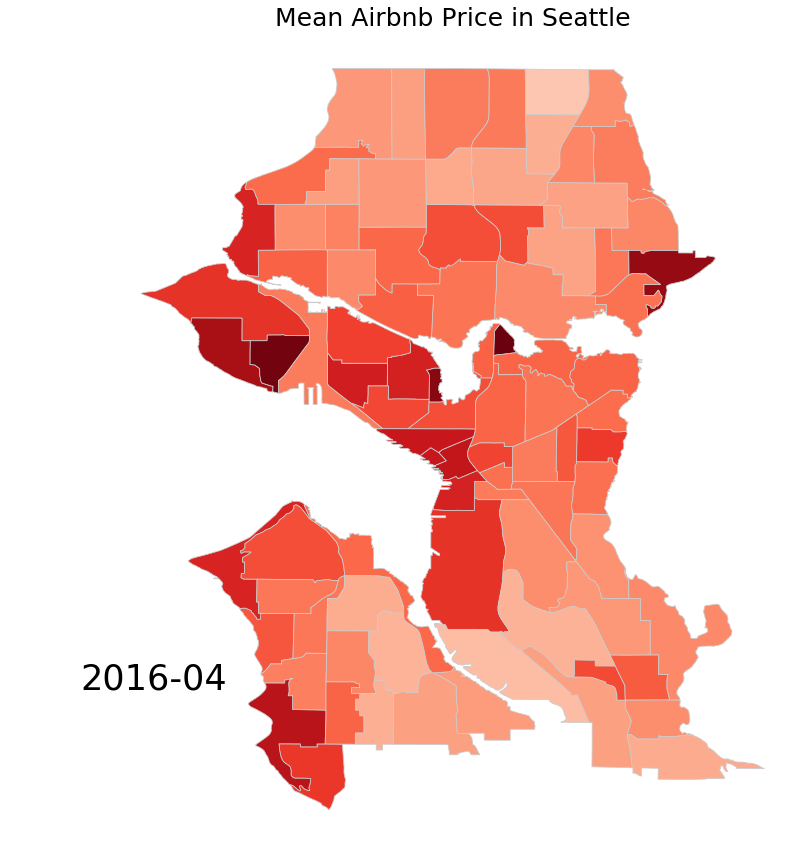

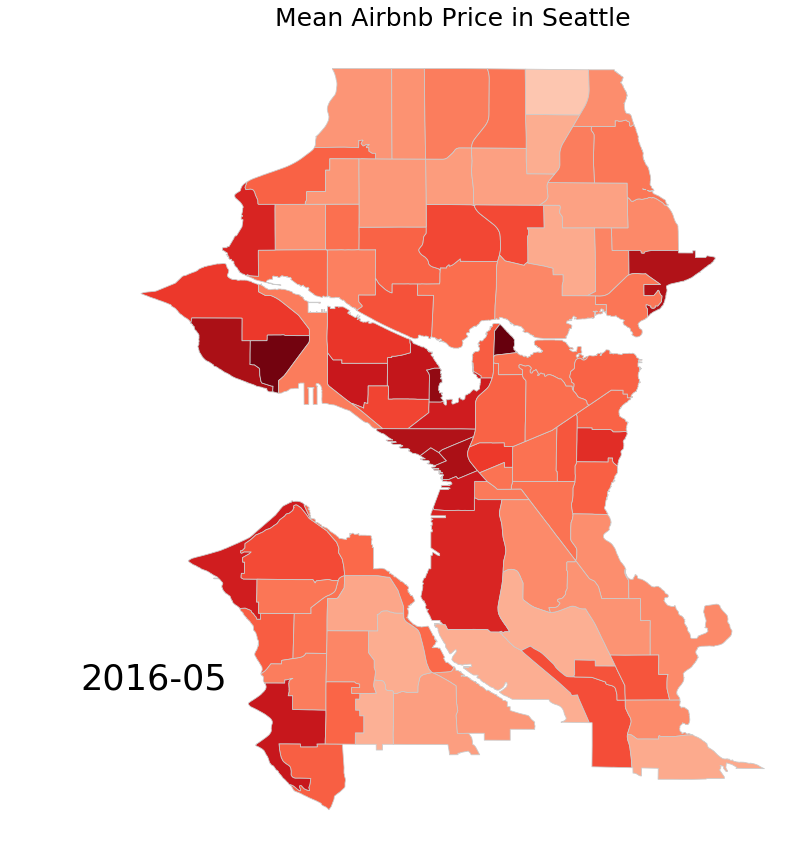

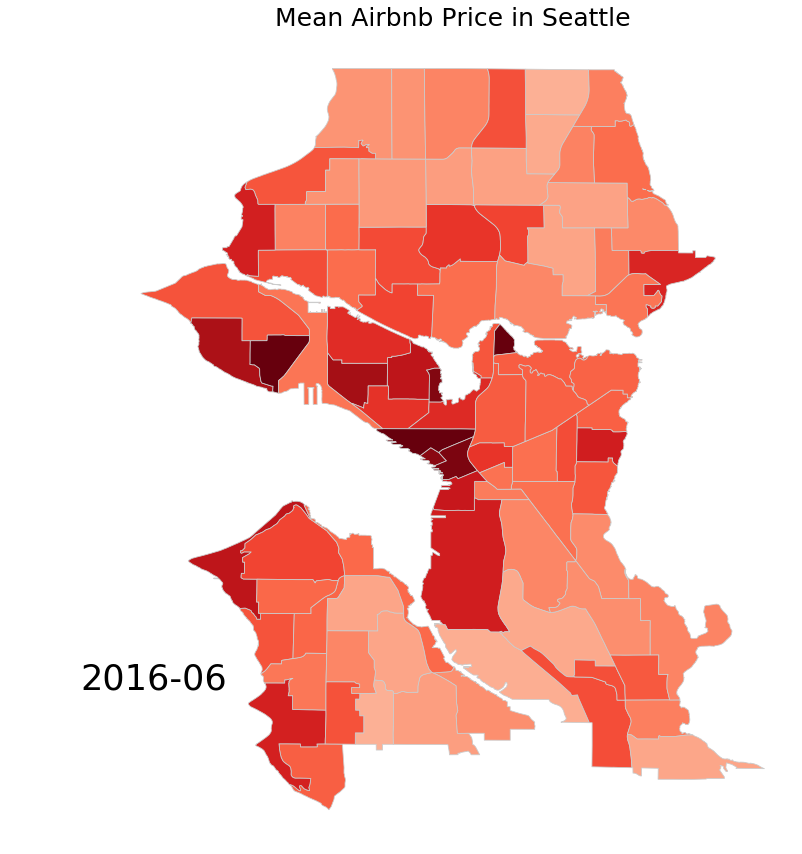

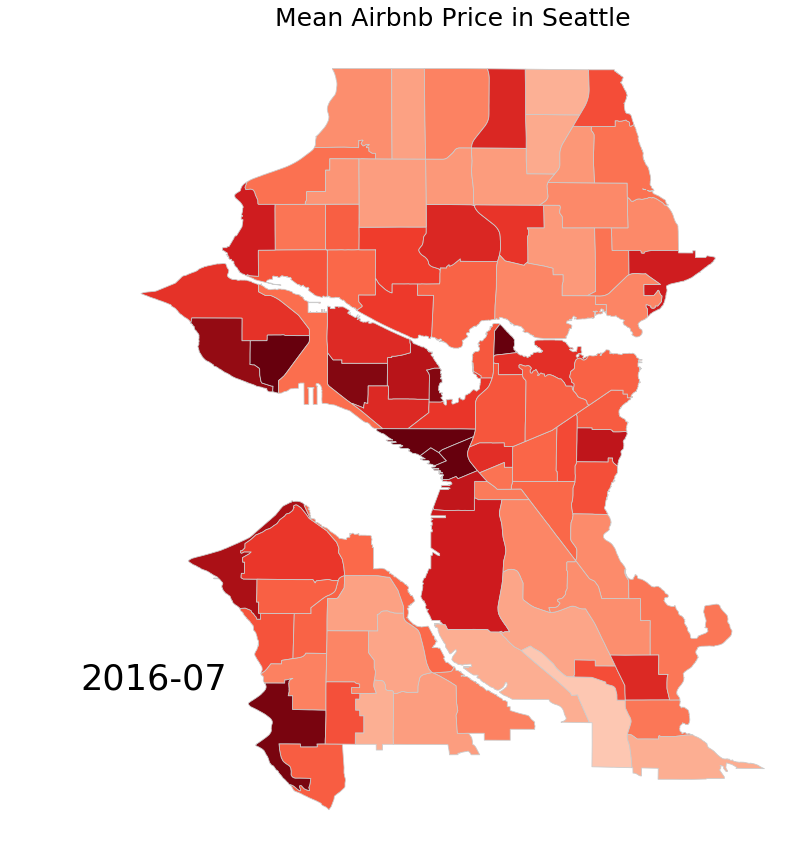

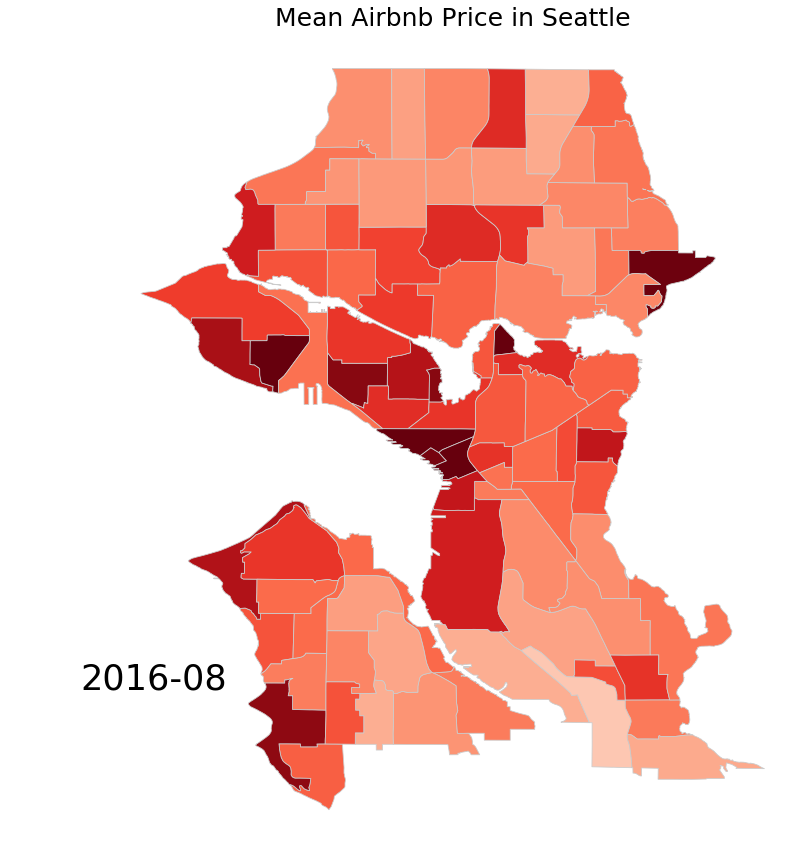

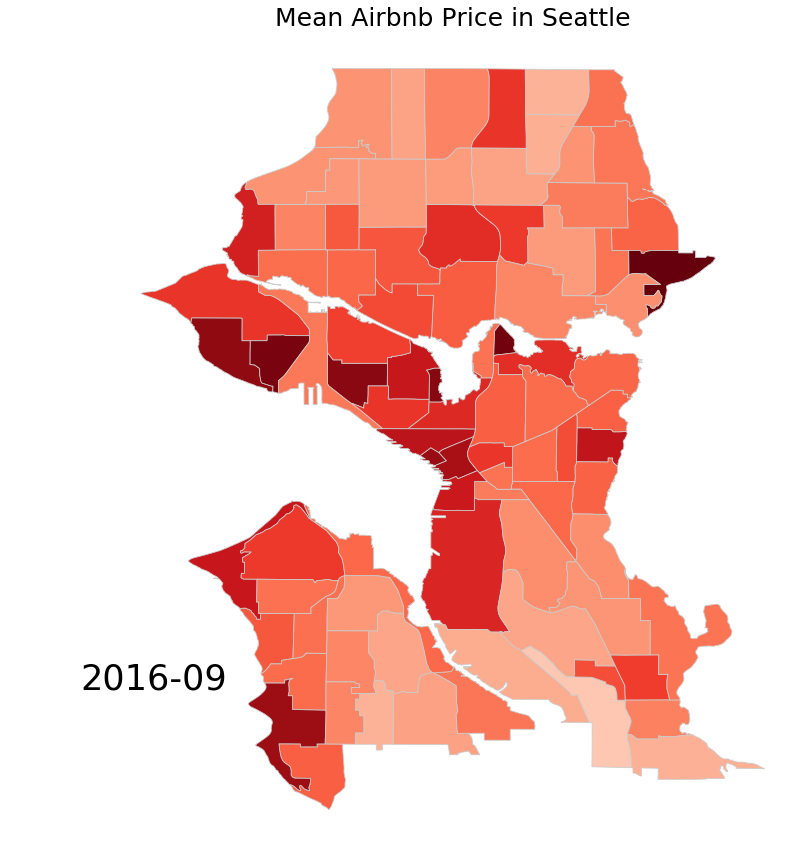

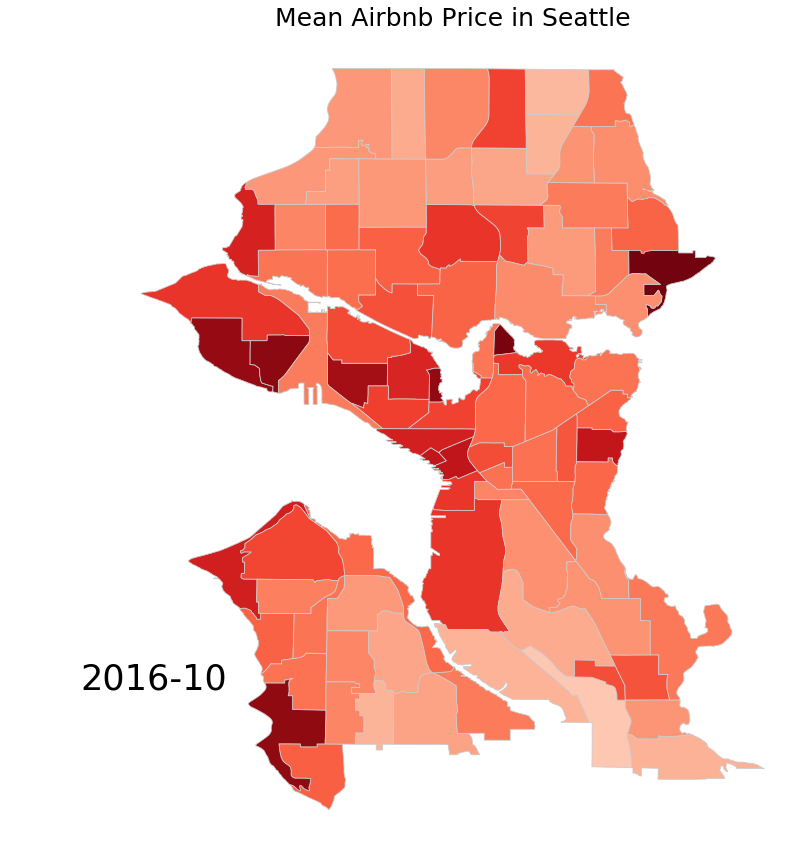

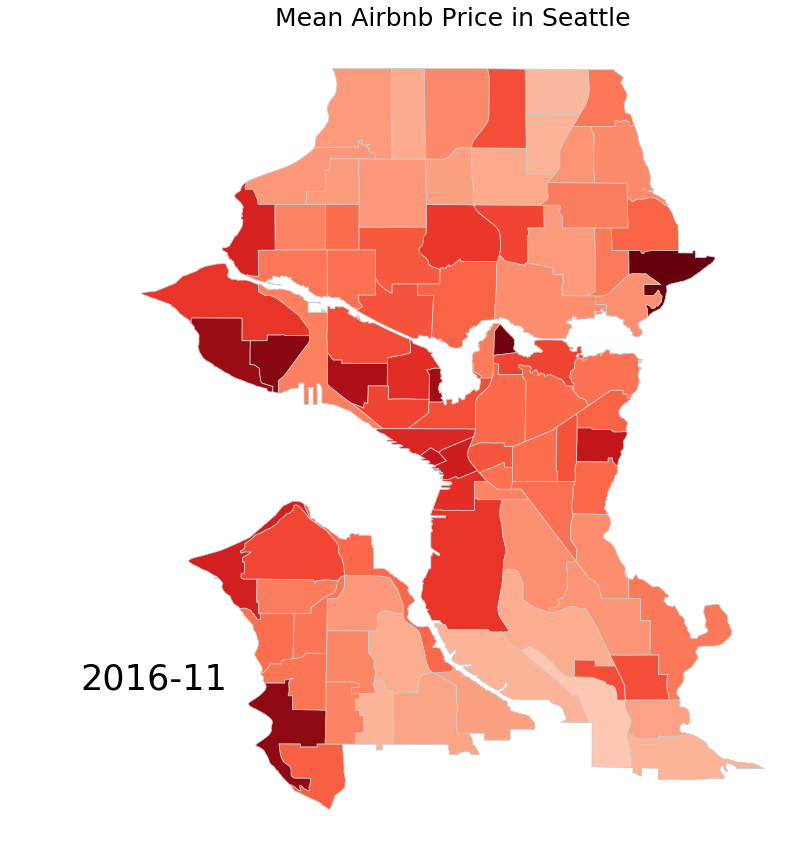

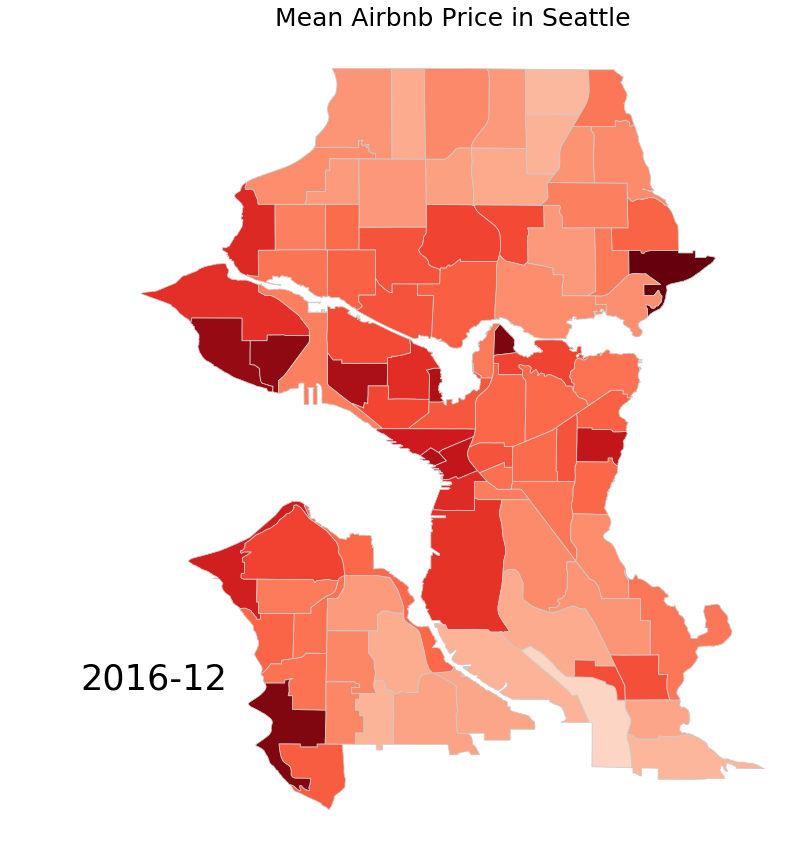

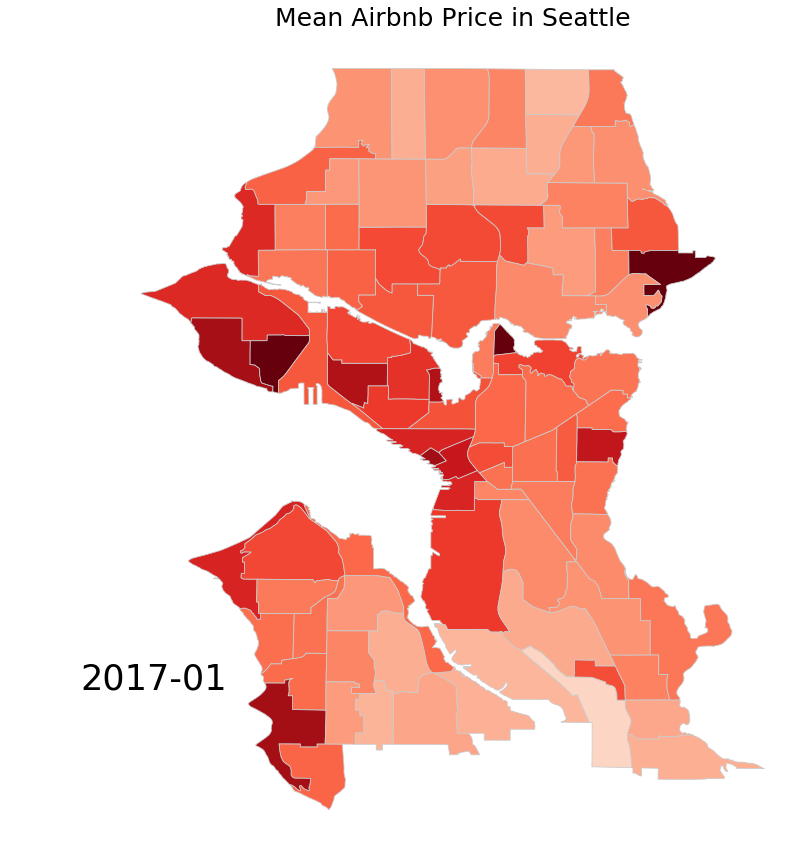

In [16]:
for my in month_year:
    calendar_geo_area_by_month = calendar_geo_area[calendar_geo_area.month_year == my]
    calendar_geo_area_agg = calendar_geo_area_by_month[['OBJECTID_1','price']].groupby('OBJECTID_1', as_index=False).mean()
    calendar_geo_area_agg =  pd.merge(map,calendar_geo_area_agg, on = 'OBJECTID_1',how = 'inner')

    fig,ax = plt.subplots(figsize = (15,15));    
    fig  = calendar_geo_area_agg.plot(ax = ax, column = 'price', cmap = 'Reds', \
                                         figsize=(10,10), linewidth=0.8, edgecolor='0.8', \
                                         vmin = 10, vmax = 250, norm=plt.Normalize(vmin = 10, vmax=250));


    fig.axis('off')
    fig.set_title('Mean Airbnb Price in Seattle', \
                  fontdict={'fontsize': '25','fontweight' : '3'})
    fig.annotate(my,xy=(0.1, .225), xycoords='figure fraction',horizontalalignment='left', verticalalignment='top',fontsize=35);
    filepath = os.path.join(price_maps_path, my + '_price.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)



In [28]:
calendar_geo_area2 = calendar_geo.copy()
calendar_geo_area2['month_year'] =  calendar_geo_area2['date'].apply(lambda r: r.strftime('%Y-%m'))
calendar_geo_area2 = calendar_geo_area2.dropna(subset = ['available'],axis = 0, how= 'any')
month_year2 = calendar_geo_area2['month_year'].unique()


In [39]:
calendar_geo_vac = calendar_geo.copy()
calendar_geo_vac['month_year'] = calendar_geo_vac['date'].apply(lambda r: r.strftime('%Y-%m'))
calendar_geo_vac = calendar_geo_vac.dropna(subset = ['date'],axis = 0, how= 'any')
month_year2 = calendar_geo_vac['month_year'].unique()

In [38]:
calendar_geo_vac.available.unique()

array([1, 0], dtype=int64)

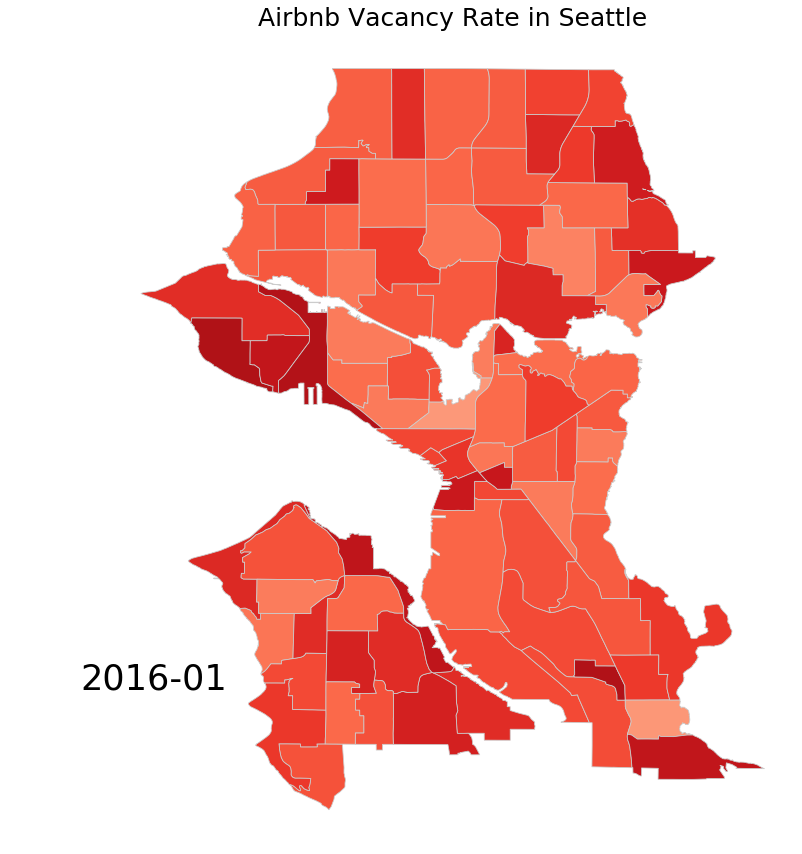

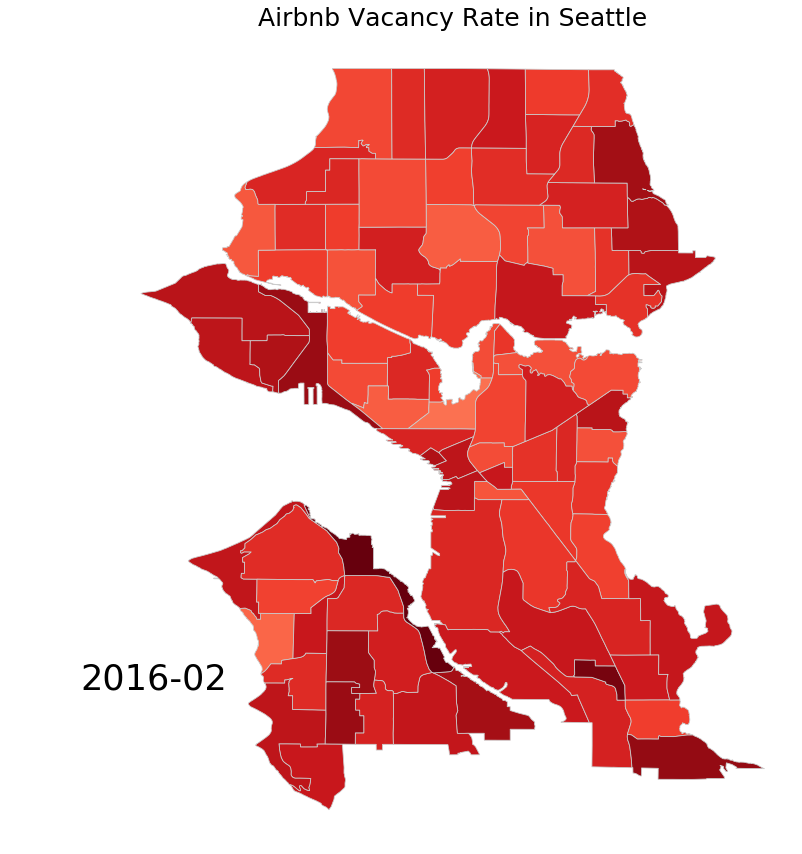

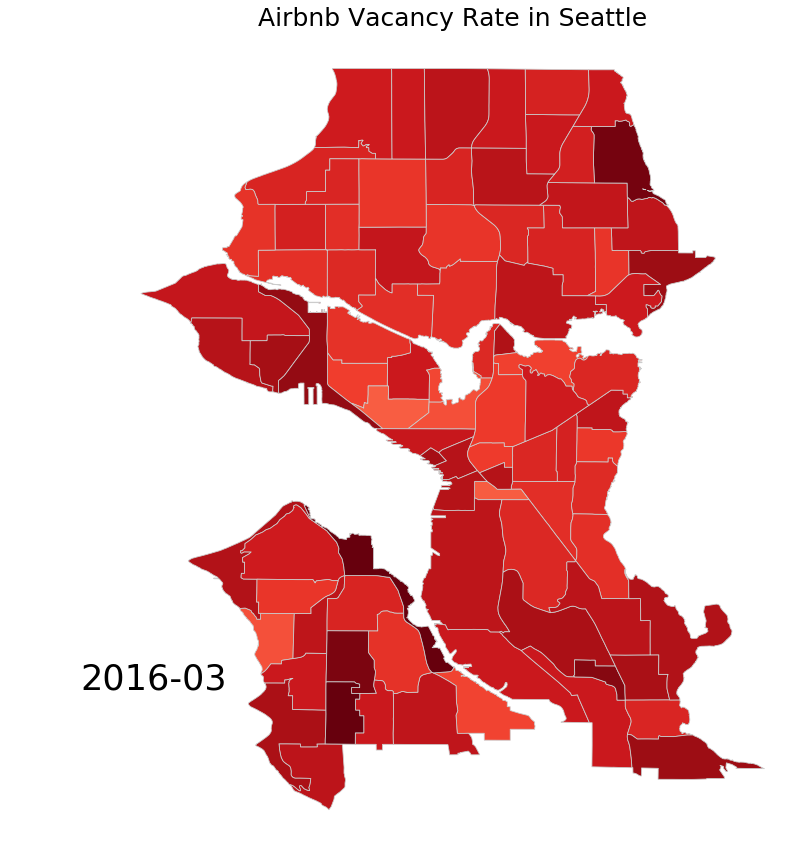

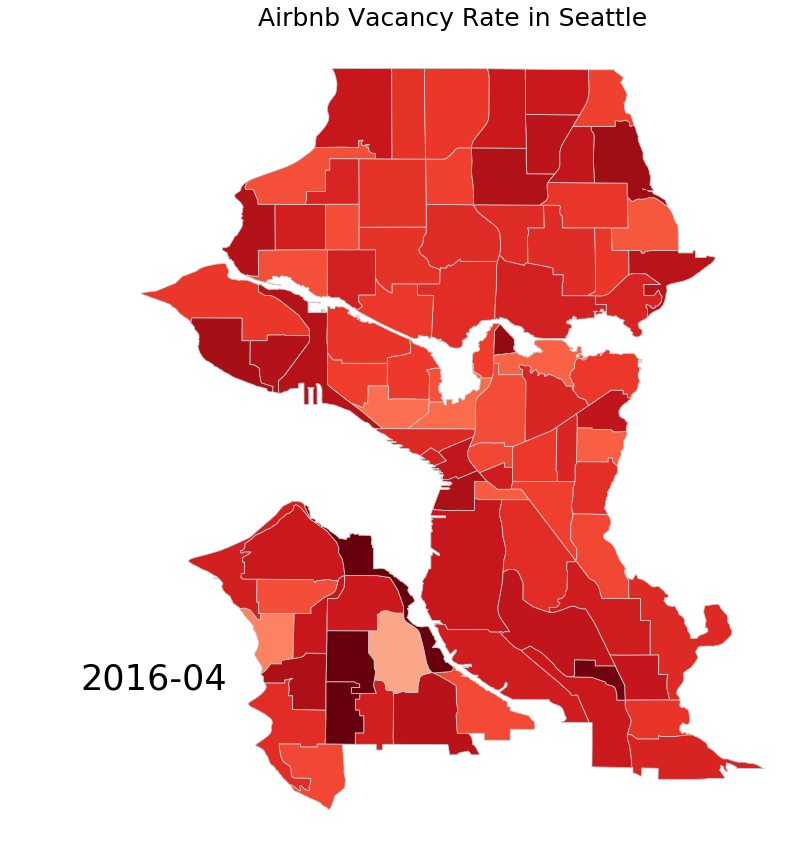

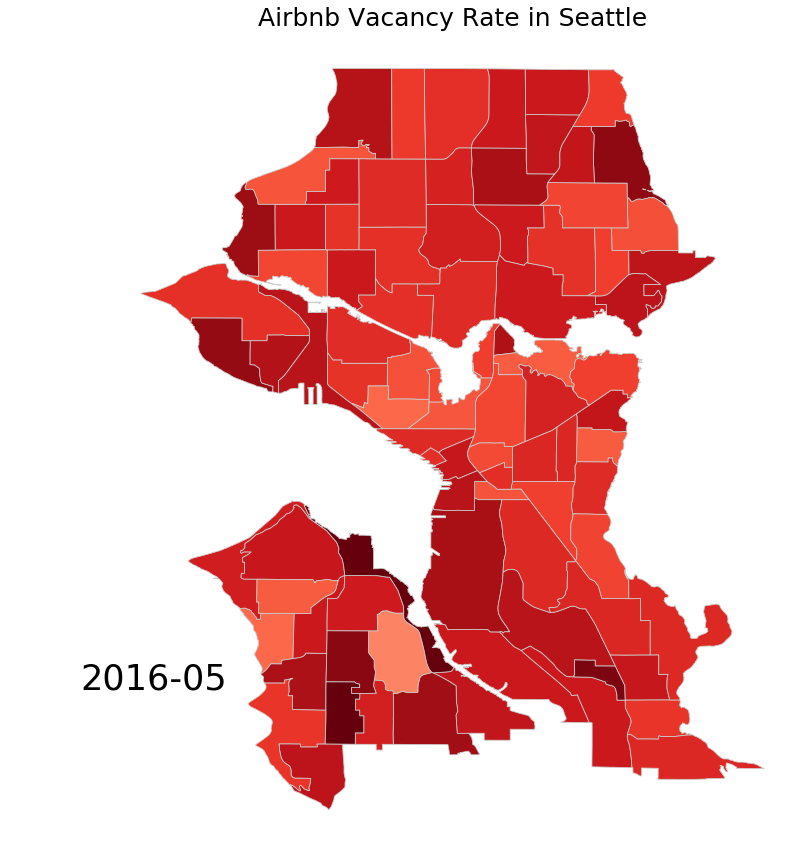

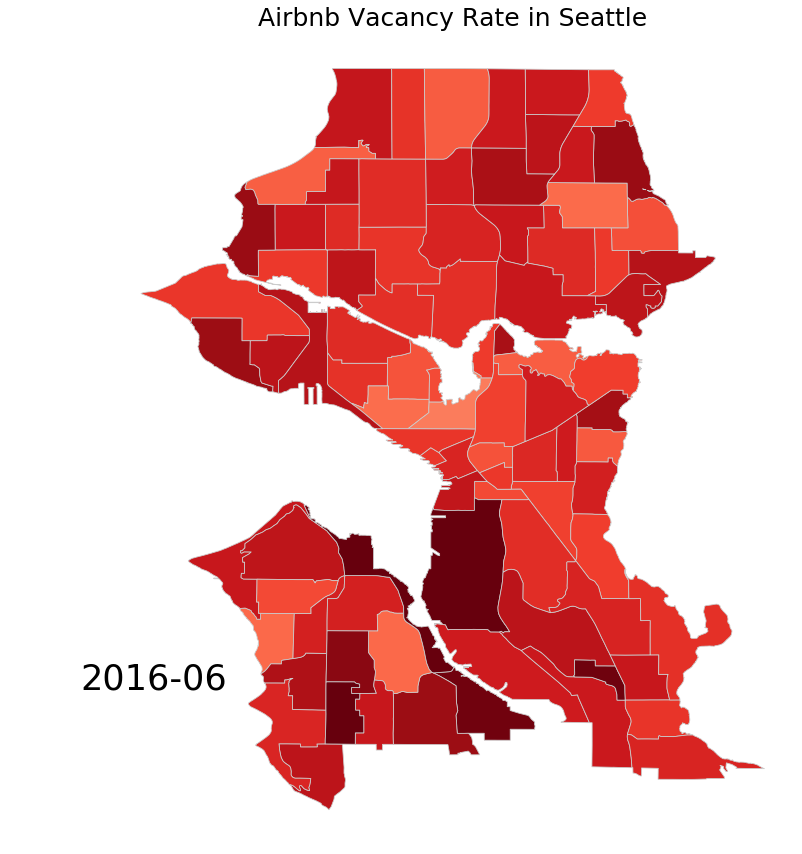

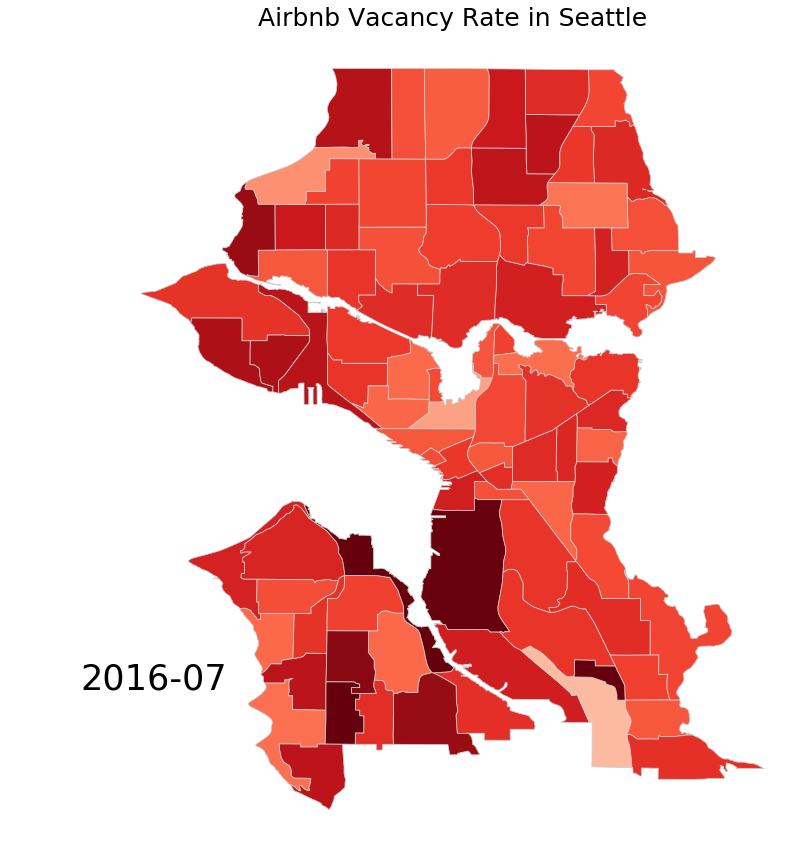

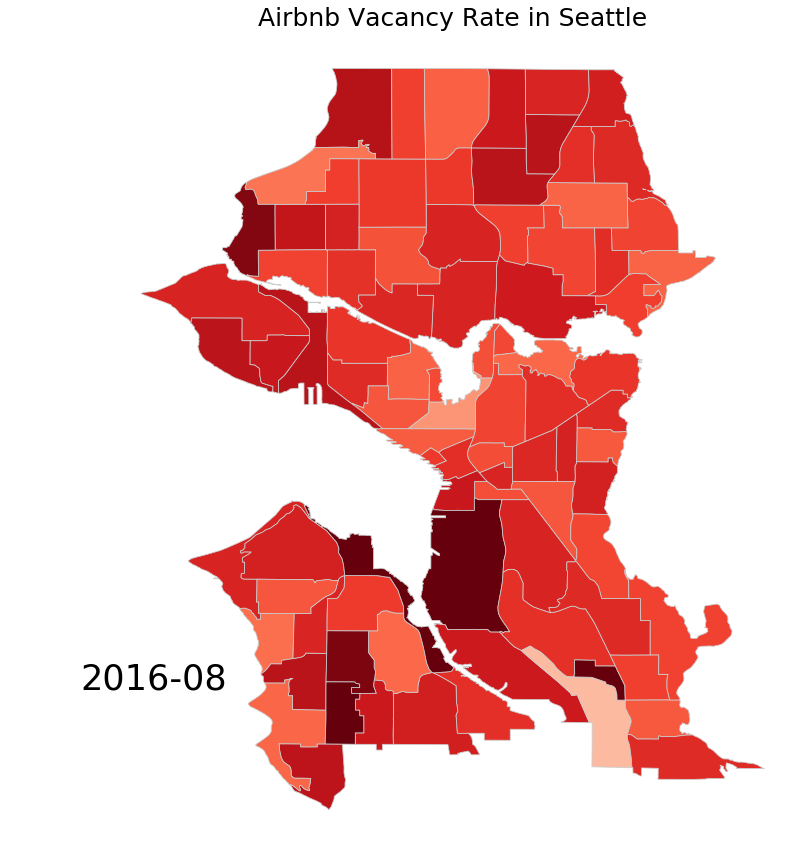

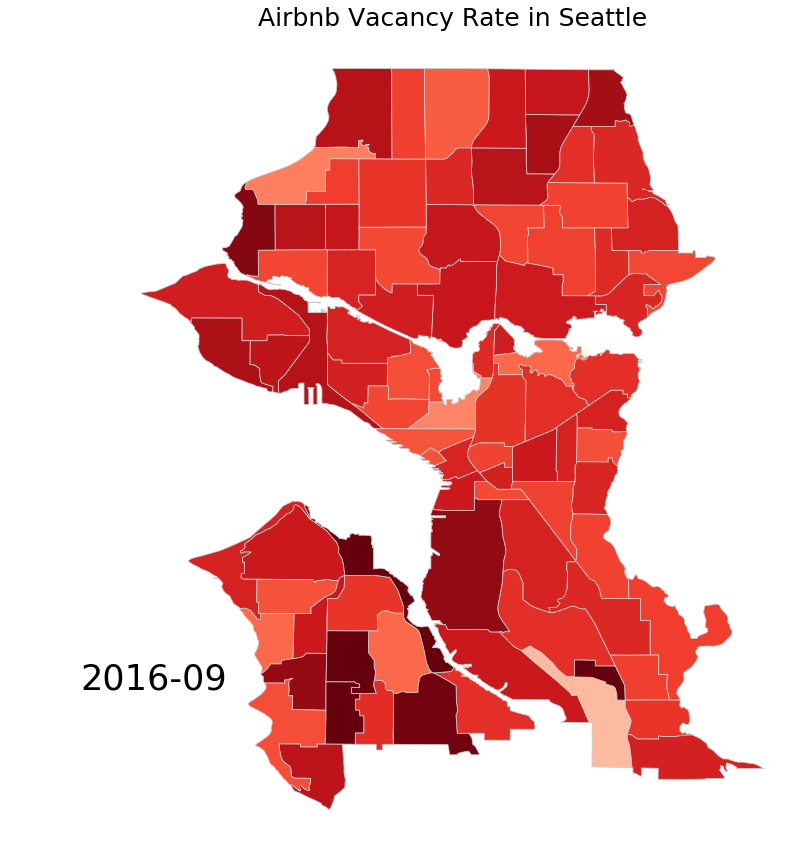

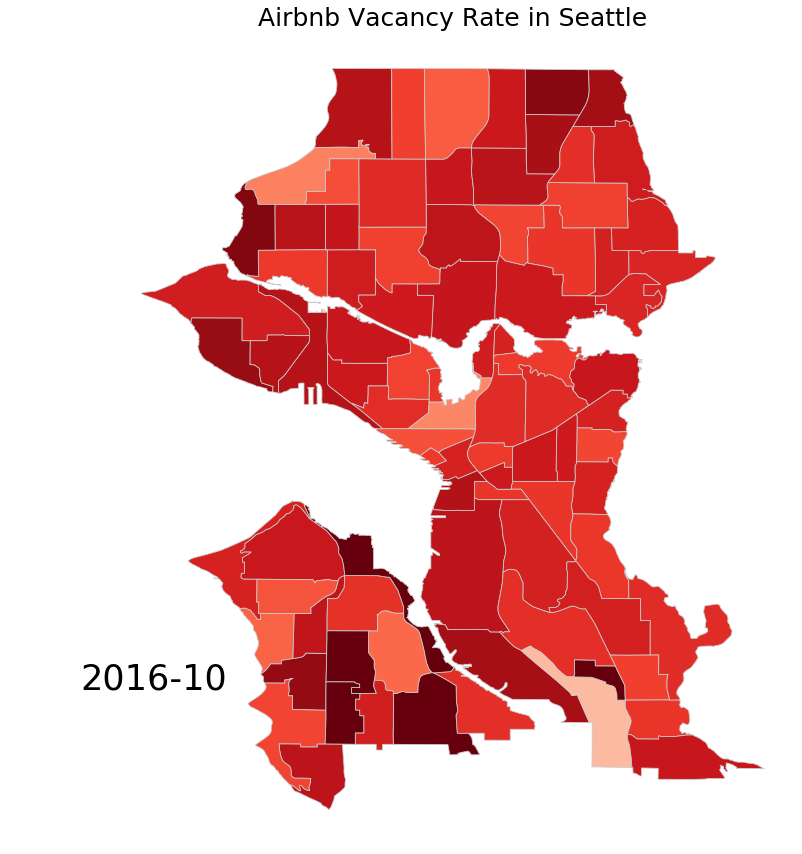

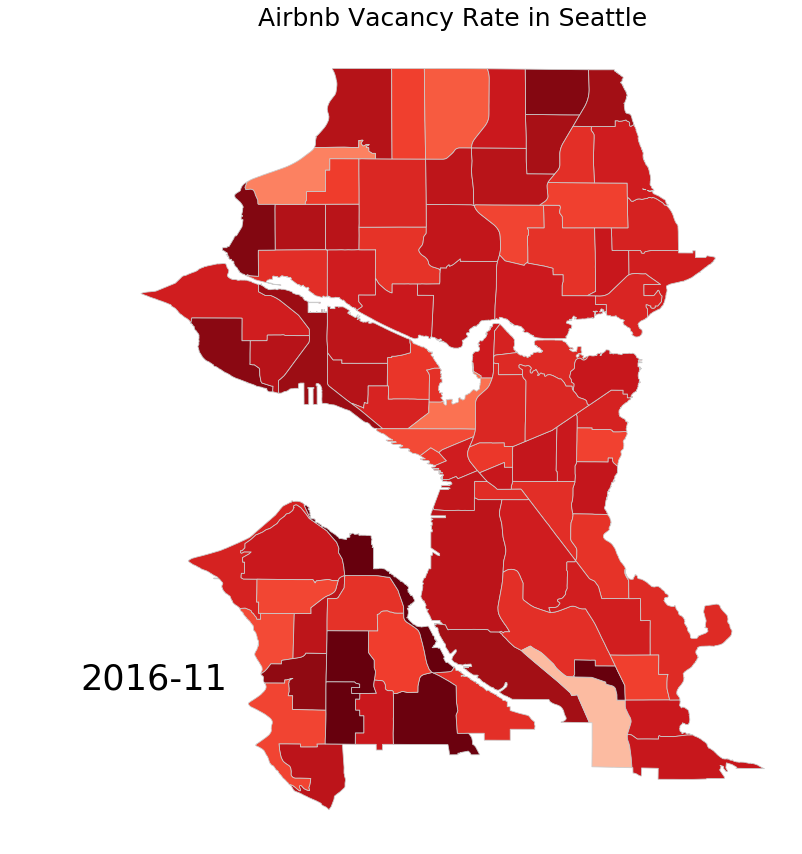

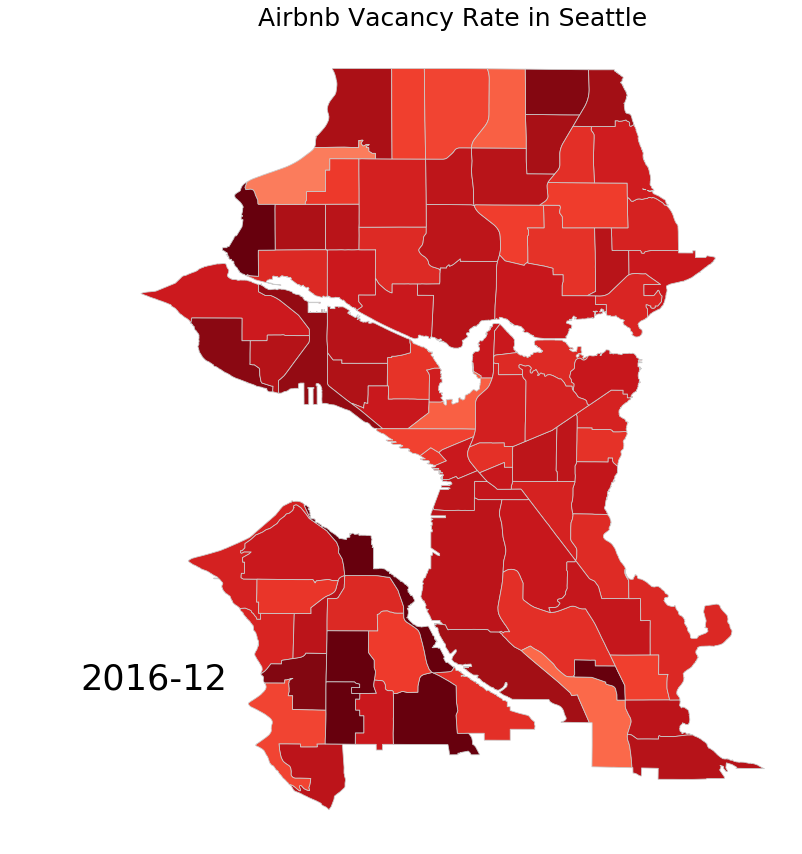

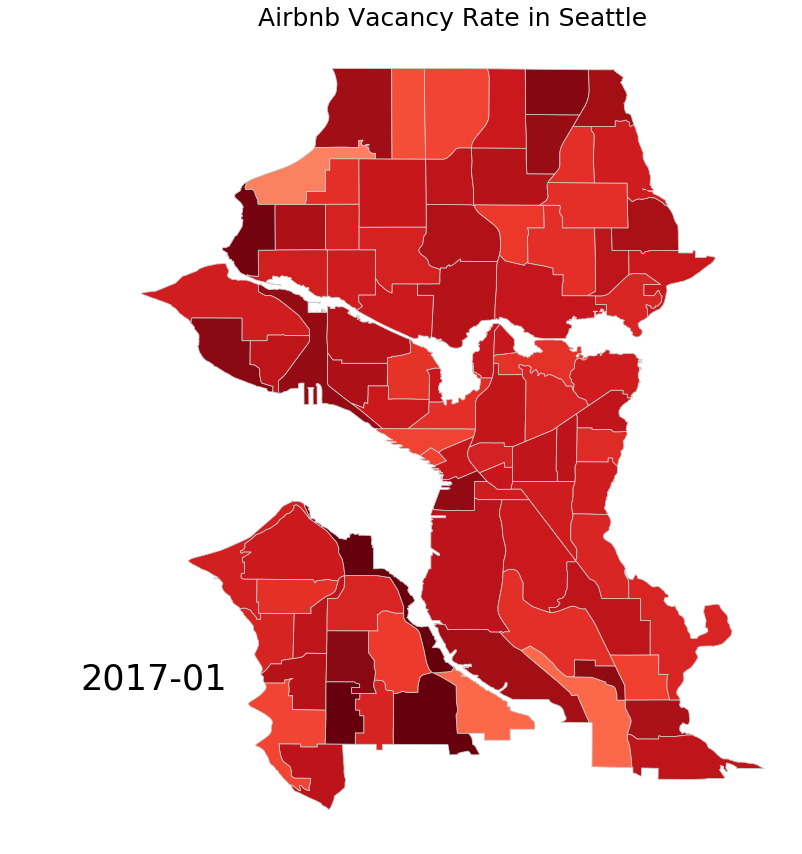

In [45]:
for my in month_year2:
    calendar_geo_area_by_month = calendar_geo_vac[calendar_geo_vac.month_year == my]
    calendar_geo_area_agg = calendar_geo_area_by_month[['OBJECTID_1','available']].groupby('OBJECTID_1', as_index=False).mean()
    calendar_geo_area_agg =  pd.merge(map,calendar_geo_area_agg, on = 'OBJECTID_1',how = 'inner')

    fig,ax = plt.subplots(figsize = (15,15));    
    fig  = calendar_geo_area_agg.plot(ax = ax, column = 'available', cmap = 'Reds', \
                                         figsize=(10,10), linewidth=0.8, edgecolor='0.8', \
                                         vmin = 0, vmax = 1, norm=plt.Normalize(vmin = 0, vmax=1));


    fig.axis('off')
    fig.set_title('Airbnb Vacancy Rate in Seattle', \
                  fontdict={'fontsize': '25','fontweight' : '3'})
    fig.annotate(my,xy=(0.1, .225), xycoords='figure fraction',horizontalalignment='left', verticalalignment='top',fontsize=35);
    filepath = os.path.join(vacancy_maps_path, my + '_vacancy_rate.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

C:\Users\alexa\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


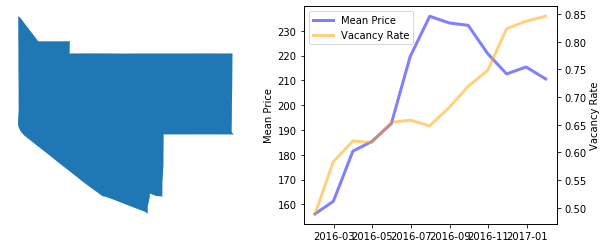

In [20]:
feat_per_area_plot(44)

In [21]:
listings.keys()


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '